## Random Forest

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # Para escalar las variables
import matplotlib.pyplot as plt

    
# 1. Cargar datos
data = pd.read_csv('data/cleaned_data.csv')  # Reemplaza 'tu_archivo.csv'



In [35]:
# --- Random Forest para cpu_cores ---

# 2. Seleccionar la variable objetivo y las predictoras para cpu_cores
X_cpu = data[['memory_gbs','gpu_cores', 'total_usage']]  #  variables predictoras 
y_cpu = data['cpu_cores']

# 3. Preprocesamiento para cpu_cores 
scaler_cpu = StandardScaler()
X_cpu_scaled = scaler_cpu.fit_transform(X_cpu)

# 4. Dividir los datos en conjuntos de entrenamiento y prueba para cpu_cores
X_cpu_train, X_cpu_test, y_cpu_train, y_cpu_test = train_test_split(X_cpu_scaled, y_cpu, test_size=0.2, random_state=42)  # 80/20 split

# 5. Crear y entrenar el modelo de Random Forest para cpu_cores
model_rf_cpu = RandomForestRegressor(n_estimators=10, random_state=42)  # Ajusta los hiperparámetros según sea necesario
model_rf_cpu.fit(X_cpu_train, y_cpu_train)

# 6. Hacer predicciones para cpu_cores
y_cpu_pred = model_rf_cpu.predict(X_cpu_test)

# 7. Evaluar el modelo para cpu_cores
mse_rf_cpu = mean_squared_error(y_cpu_test, y_cpu_pred)
r2_rf_cpu = r2_score(y_cpu_test, y_cpu_pred)

print("--- Resultados Random Forest para cpu_cores ---")
print(f"Error Cuadrático Medio (MSE): {mse_rf_cpu}")
print(f"R^2: {r2_rf_cpu}")

--- Resultados Random Forest para cpu_cores ---
Error Cuadrático Medio (MSE): 1.8923106169765737e-27
R^2: 1.0


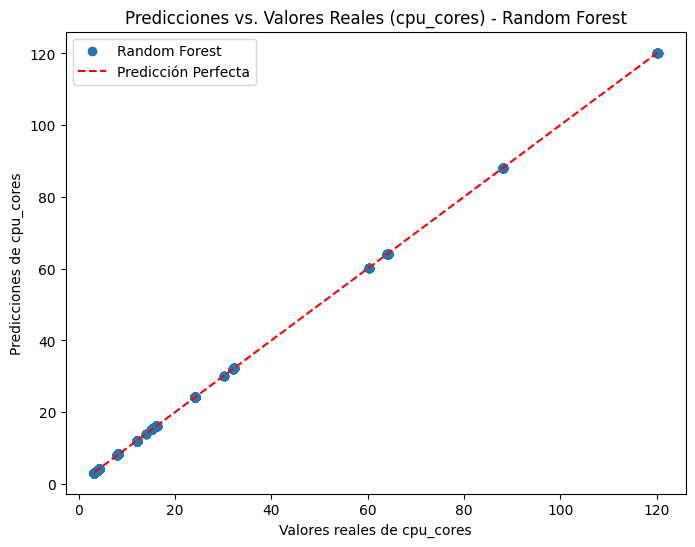

In [31]:
# --- Gráfico para cpu_cores (Random Forest) ---
plt.figure(figsize=(8, 6))
plt.scatter(y_cpu_test, y_cpu_pred, label='Random Forest')  # Usa y_cpu_pred de Random Forest
plt.plot([y_cpu_test.min(), y_cpu_test.max()], [y_cpu_test.min(), y_cpu_test.max()], 'r--', label='Predicción Perfecta')
plt.xlabel('Valores reales de cpu_cores')
plt.ylabel('Predicciones de cpu_cores')
plt.title('Predicciones vs. Valores Reales (cpu_cores) - Random Forest')
plt.legend()  # Añade una leyenda para identificar las líneas
plt.show()

In [37]:
# --- Random Forest para memory_gbs ---

# 8. Seleccionar la variable objetivo y las predictoras para memory_gbs
X_mem = data[['cpu_cores','gpu_cores', 'total_usage']]  # variables predictoras 
y_mem = data['memory_gbs']

# 9. Preprocesamiento para memory_gbs 
X_mem_scaled = scaler_mem.fit_transform(X_mem)

# 10. Dividir los datos en conjuntos de entrenamiento y prueba para memory_gbs
X_mem_train, X_mem_test, y_mem_train, y_mem_test = train_test_split(X_mem_scaled, y_mem, test_size=0.2, random_state=42)

# 11. Crear y entrenar el modelo de Random Forest para memory_gbs
model_rf_mem = RandomForestRegressor(n_estimators=100, random_state=42)  # Ajusta los hiperparámetros según sea necesario
model_rf_mem.fit(X_mem_train, y_mem_train)

# 12. Hacer predicciones para memory_gbs
y_mem_pred = model_rf_mem.predict(X_mem_test)

# 13. Evaluar el modelo para memory_gbs
mse_rf_mem = mean_squared_error(y_mem_test, y_mem_pred)
r2_rf_mem = r2_score(y_mem_test, y_mem_pred)

print("\n--- Resultados Random Forest para memory_gbs ---")
print(f"Error Cuadrático Medio (MSE): {mse_rf_mem}") #2.18
print(f"R^2: {r2_rf_mem}")


--- Resultados Random Forest para memory_gbs ---
Error Cuadrático Medio (MSE): 2.1860924353727014
R^2: 0.9989475985739094


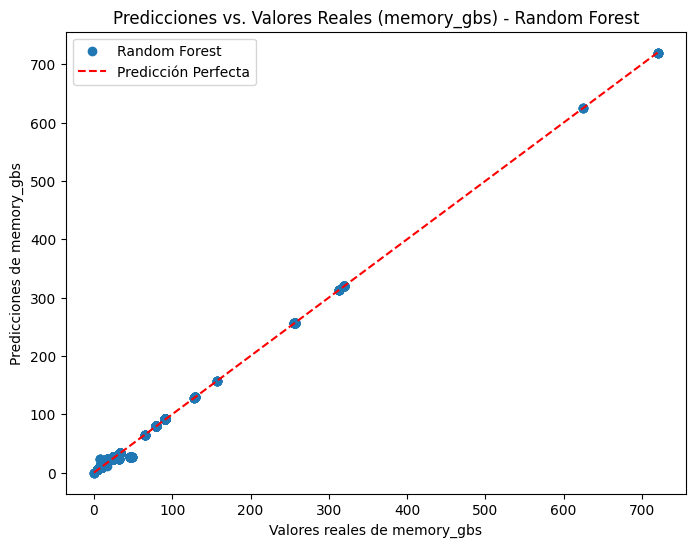

In [33]:
# --- Gráfico para memory_gbs (Random Forest) ---
plt.figure(figsize=(8, 6))
plt.scatter(y_mem_test, y_mem_pred, label='Random Forest')  # Usa y_mem_pred de Random Forest
plt.plot([y_mem_test.min(), y_mem_test.max()], [y_mem_test.min(), y_mem_test.max()], 'r--', label='Predicción Perfecta')
plt.xlabel('Valores reales de memory_gbs')
plt.ylabel('Predicciones de memory_gbs')
plt.title('Predicciones vs. Valores Reales (memory_gbs) - Random Forest')
plt.legend()
plt.show()